**1. IMPORTS**

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import data file, skip first row and adjust na-values
data = pd.read_csv("data/2315676.txt", delim_whitespace=True, skiprows = [1], na_values = ["-9999"])

#check data
data

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0
...,...,...,...,...,...,...
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0


**2. CALCULATE AVERAGE AND REPLACE NaN VALUES IN TAVG**

In [2]:
#create new column and fill it with mean calculations
data["temp_avg"] = (data["TMAX"] + data["TMIN"]) / 2
#replace NaN in TAVG with temp_avg and drop still remaining NaN
data.TAVG.fillna(data.temp_avg, inplace = True)
data.dropna(subset=["TAVG"], inplace = True)

#check data
data

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,temp_avg
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0
...,...,...,...,...,...,...,...
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,NaN
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,42.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,NaN
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,44.5


**3. CONVERT TEMPERATURES FROM FAHRENHEIT TO CELSIUS WITH A FUNCTION**

In [3]:
#create function to convert temps
def fahr_to_celsius(temp_fahr):
    """
    Function to calculate degree Farenheit to degree Celsius
    temp_fahr is number of degree Farenheit that should be calculated
    returns this number in degree Celsius
    """
    temp_cels = (temp_fahr - 32) / 1.8
    return temp_cels

#apply function to TAVG and rename column
data["TAVG"] = data["TAVG"].apply(fahr_to_celsius)
data.rename(columns = {"TAVG": "TAVG_C"}, inplace = True)

#check data
data

,STATION,STATION_NAME,DATE,TAVG_C,TMAX,TMIN,temp_avg
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-27.500000,2.0,-37.0,-17.5
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-23.333333,6.0,-26.0,-10.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-23.333333,7.0,-27.0,-10.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-26.111111,-3.0,-27.0,-15.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-26.666667,4.0,-36.0,-16.0
...,...,...,...,...,...,...,...
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,8.333333,51.0,NaN,NaN
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,6.111111,47.0,37.0,42.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,5.555556,NaN,37.0,NaN
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,7.222222,46.0,43.0,44.5


**4. CALCULATE SEASONAL AVERAGE TEMPERATURES**

In [4]:
#slice date to get seperate columns with month and year
data["DATE_STR"] = data["DATE"].astype(str)
data["month"] = data["DATE_STR"].str.slice(start = 4, stop = 6)
data["year"] = data["DATE_STR"].str.slice(start = 0, stop = 4)

#create function to assign season to rows
def assign_season(row):
    if (row["month"] == "12") or (row["month"] == "01") or (row["month"] == "02"):
        return "winter"
    if (row["month"] == "03") or (row["month"] == "04") or (row["month"] == "05"):
        return "spring"
    if (row["month"] == "06") or (row["month"] == "07") or (row["month"] == "08"):
        return "summer"
    else:
        return "autumn"
#create season column and add data with applying function
data["season"] = data.apply(lambda row: assign_season(row), axis=1)

#group season and year to get avg for individual years
data["season_year"] = data["season"] + data["year"]
season_grouped = data.groupby("season_year")

#create empty data frame for season avg
season_avg = pd.DataFrame()
# loop to caculate mean and add to season_avg
mean = ["TAVG_C"]
#iterating over all groups
for key, group in season_grouped:
    #calculate mean
    mean_value = group[mean].mean()
    #add key
    mean_value["season_year"] = key
    #add mean values to data frame
    row = mean_value.to_frame().transpose()
    season_avg = pd.concat([season_avg, row], ignore_index = True)

#rename column TAVG_C
season_avg.rename(columns = {"TAVG_C": "temp_avg"}, inplace = True)

#check data
season_avg

,temp_avg,season_year
0,-1.859217,autumn1908
1,-0.155827,autumn1909
2,-1.742063,autumn1910
3,-1.27915,autumn1911
4,-2.073413,autumn1912
...,...,...
447,-11.190476,winter2016
448,-10.111111,winter2017
449,-11.555556,winter2018
450,-11.395062,winter2019


**5. CALCULATE SEASONAL AVERAGE TEMPERATURE FOR REFERENCE PERIOD 1951-1980**


In [5]:
#take only season specific data 
winter_data = data.loc[data["season"] == "winter"]
spring_data = data.loc[data["season"] == "spring"]
summer_data = data.loc[data["season"] == "summer"]
autumn_data = data.loc[data["season"] == "autumn"]

#filter season specific data according to reference time
winter_ref = winter_data.loc[(data["year"] >= "1951") & (data["year"] < "1980")]
spring_ref = spring_data.loc[(data["year"] >= "1951") & (data["year"] < "1980")]
summer_ref = summer_data.loc[(data["year"] >= "1951") & (data["year"] < "1980")]
autumn_ref = autumn_data.loc[(data["year"] >= "1951") & (data["year"] < "1980")]

#calculate and print average for each season
winter_avg = winter_ref["TAVG_C"].mean()
print(f"The average temperature for winter is", winter_avg)
spring_avg = spring_ref["TAVG_C"].mean()
print(f"The average temperature for spring is",spring_avg)
summer_avg = summer_ref["TAVG_C"].mean()
print(f"The average temperature for summer is",summer_avg)
autumn_avg = autumn_ref["TAVG_C"].mean()
print(f"The average temperature for autumn is",autumn_avg)

The average temperature for winter is -13.447013119347853
The average temperature for spring is -2.343561221513977
The average temperature for summer is 12.370689655172415
The average temperature for autumn is -0.747199056524303


**6. CALCULATE SEASONAL TEMPERATURE ANOMALIES**

In [6]:
#add column season
season_avg["season"] = season_avg["season_year"].str.slice(stop = -4)

#create function to assign average values to seasons
def assign_refvalue(row):
    if row["season"] == "winter":
        return winter_avg
    if row["season"] == "spring":
        return spring_avg
    if row["season"] == "summer":
        return summer_avg
    else:
        return autumn_avg
#apply function
season_avg["season_ref"] = season_avg.apply(lambda row: assign_refvalue(row), axis=1)

#calculate anomalies with diff 
season_avg["diff"] = season_avg["temp_avg"] - season_avg["season_ref"]      

**7. PLOT THE DATA**

In [7]:
#add column with year and remove unwanted columns
season_avg["year"] = season_avg["season_year"].str.slice(start = -4)
season_avg = season_avg.drop(["temp_avg", "season_year", "season_ref"], axis = 1)

#check data
season_avg.head()

,season,diff,year
0,autumn,-1.112018,1908
1,autumn,0.591372,1909
2,autumn,-0.994864,1910
3,autumn,-0.53195,1911
4,autumn,-1.326214,1912


*NOTE: In the graphic below I did not manage to display the years as label in the x-axis, instead of the index*

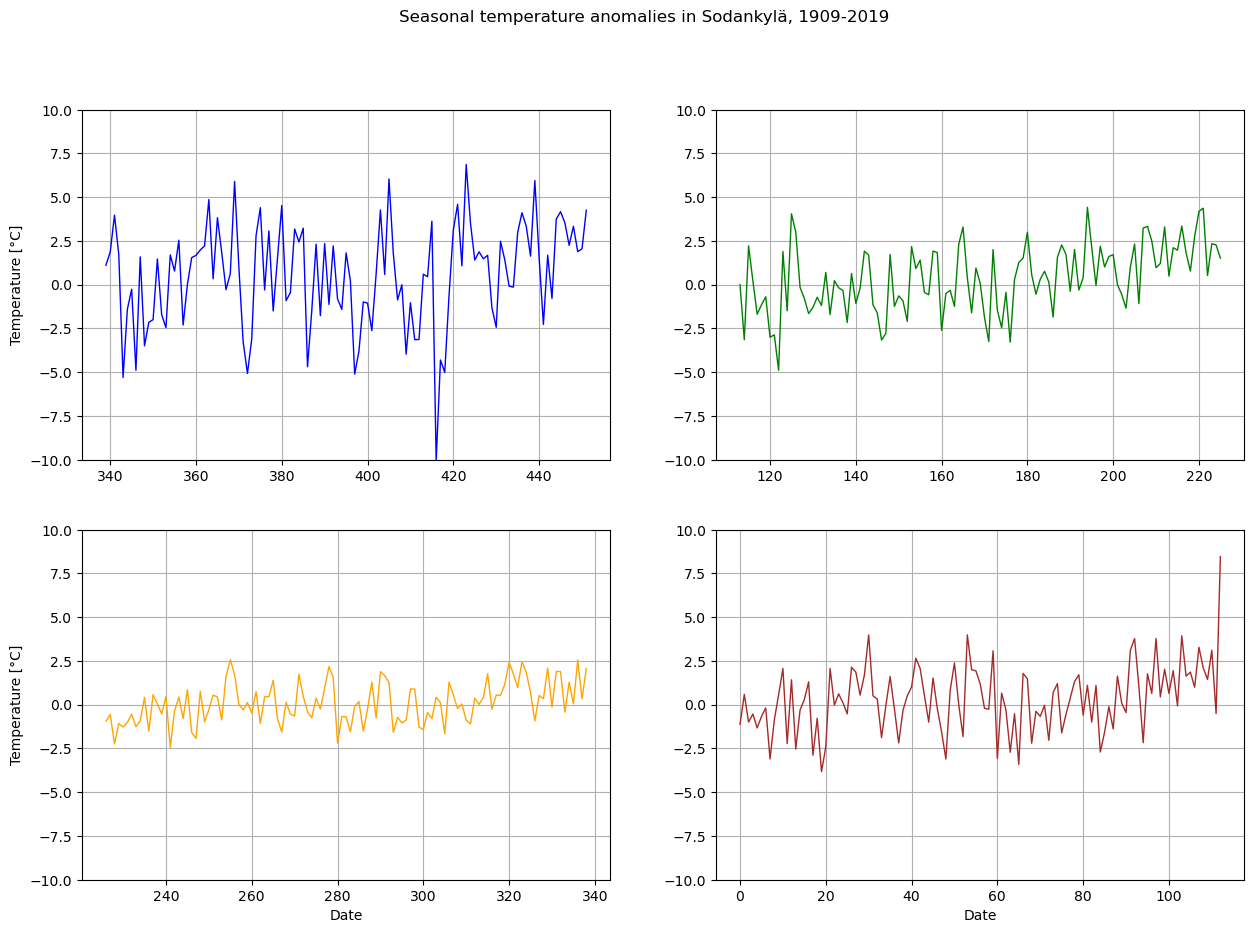

In [8]:
#create empty figures
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

#creating variables for axes
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

#set line width
line_width = 1

#plot data
winter = season_avg.loc[season_avg["season"] == "winter"]
winter_diff = winter["diff"]
winter_diff.plot(ax=ax11, x = "year", y= "diff", c = "blue", lw = line_width, ylim = [-10, 10], grid = True)

spring = season_avg.loc[season_avg["season"] == "spring"]
spring_diff = spring["diff"]
spring_diff.plot(ax=ax12, x = "year", y= "diff", c = "green", lw = line_width, ylim = [-10, 10], grid = True)

summer = season_avg.loc[season_avg["season"] == "summer"]
summer_diff = summer["diff"]
summer_diff.plot(ax=ax21, x = "year", y= "diff", c = "orange", lw = line_width, ylim = [-10, 10], grid = True)

autumn = season_avg.loc[season_avg["season"] == "autumn"]
autumn_diff = autumn["diff"]
autumn_diff.plot(ax=ax22, x = "year", y= "diff", c = "brown", lw = line_width, ylim = [-10, 10], grid = True)

# Set figure title
fig.suptitle("Seasonal temperature anomalies in Sodankylä, 1909-2019")

# Axis labels
ax21.set_xlabel("Date")
ax22.set_xlabel("Date")
ax11.set_ylabel("Temperature [°C]")
ax21.set_ylabel("Temperature [°C]")

#create png
outputfp = None
outputfp = "temp_anomalies.png"
outputfp = plt.savefig("temp_anomalies")